In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle


In [2]:
!pip install nltk

  Running setup.py bdist_wheel for nltk: started
  Running setup.py bdist_wheel for nltk: finished with status 'done'
  Stored in directory: C:\Users\Dell\AppData\Local\pip\Cache\wheels\4b\c8\24\b2343664bcceb7147efeb21c0b23703a05b23fcfeaceaa2a1e
Successfully built nltk


You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import nltk

In [3]:
data = pd.read_csv("E:/Amazon_Unlocked_Mobile.csv")

In [4]:
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


# Exploring Data

In [5]:
data.shape

(413840, 6)

In [6]:
data.isna().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64

In [7]:
data.columns

Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes'],
      dtype='object')

In [8]:
product_name = []
for i in data["Product Name"]:
    if (i in product_name):
        continue
    else:
        product_name.append(i)

In [9]:
len(product_name)

4410

In [18]:
# there are 4410 phone models in this data

In [10]:
data["Brand Name"]
brands = []
for i in data["Brand Name"]:
    if (i in brands):
        continue
    else:
        brands.append(i)

In [11]:
len(brands)
# there are 385 brands in this data

385

In [8]:
# converting it into DataFrame
data_df = pd.DataFrame(data)

In [9]:
data_df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [10]:
data_df = shuffle(data_df)

In [11]:
data_df[:10]

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
3322,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.00,5,The iphone works great!,0.0
340538,"Samsung Galaxy S3 SCH-I535 Verizon Phone, 16GB...",Samsung,92.50,5,좋군. Good.,0.0
9029,Apple iPhone 4 32GB (Black) - Verizon,Apple,69.98,5,perfect,NaN
205384,Indigi® Unlocked Android 4.4 KK 3G SmartPhone ...,Indigi,109.92,5,My daughter love the phone,0.0
225883,LG Google Nexus 5 D821 16GB Factory Unlocked (...,LG,385.00,5,Is an excelent phone!!,0.0
217537,LG G3 Beat D722J 8GB Unlocked GSM Quad-Core An...,LG,69.99,4,very nice fone,0.0
108782,BLU Dash C Music-US GSM - Unlocked Cell Phone ...,BLU,54.99,4,Traveled to the Caribbean with this phone it w...,0.0
330100,Samsung Galaxy Note GT-N7000 Unlocked Cellphon...,Samsung,274.44,5,Totally and utterly thrilled with my purchase....,1.0
375693,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...,NaN,249.99,1,I returned already cuz i dostn work i hope get...,1.0
375445,Samsung Galaxy S7 Unlocked PhoneDual Sim Facto...,Samsung,679.99,5,Good!~~,0.0


In [12]:
# removing NA values from data
data_df = data_df.dropna()

In [13]:
data_df.isna().sum()

Product Name    0
Brand Name      0
Price           0
Rating          0
Reviews         0
Review Votes    0
dtype: int64

In [18]:
# There is no na value in the data

In [14]:
data_df.describe()

,Price,Rating,Review Votes
count,334335.000000,334335.000000,334335.000000
mean,222.585019,3.824888,1.474515
std,283.139353,1.541203,9.217348
min,1.730000,1.000000,0.000000
25%,75.410000,3.000000,0.000000
50%,139.000000,5.000000,0.000000
75%,264.100000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


Top 10 brands in the data set sorted on the basis of sum of Ratings.

In [15]:
info = pd.pivot_table(data_df,index=['Brand Name'],values=['Rating','Review Votes'],
                     columns = [] , aggfunc = [np.sum , np.mean] , fill_value = 0)
info.head(10)

sum                   mean             
                       Rating Review Votes    Rating Review Votes
Brand Name                                                       
AMM Global Enterprises     44            1  4.888889     0.111111
ARGOM TECH                  6            0  3.000000     0.000000
ASUS                     2092          838  4.470085     1.790598
ASUS Computers           2852          831  4.028249     1.173729
AT&T                        5            0  5.000000     0.000000
ATT                       160           25  3.636364     0.568182
Acer                       68           27  3.090909     1.227273
Aeku                       10            8  5.000000     4.000000
AeroAntenna                 5            0  5.000000     0.000000
Alcatel                  5574         3174  4.039130     2.300000

In [16]:
info = info.sort_values(by = ('sum' , 'Rating') , ascending = False )
info.head(10)

sum                   mean             
            Rating Review Votes    Rating Review Votes
Brand Name                                            
Samsung     250452        96057  3.973032     1.523795
BLU         226085        54798  3.821069     0.926143
Apple       220286       112211  3.926597     2.000160
LG           83266        22929  3.848493     1.059762
BlackBerry   61892        21114  3.750121     1.279326
Nokia        61833        25684  3.824879     1.588767
Motorola     49564        23107  3.811736     1.777051
HTC          42873        12777  3.474030     1.035329
CNPGD        38233        20151  3.107869     1.638026
OtterBox     34556         2268  4.385279     0.287817

In [17]:
data_df.columns

Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes'],
      dtype='object')

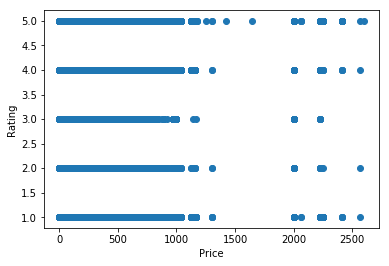

In [18]:

plt.scatter(data_df.Price , data_df.Rating)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()


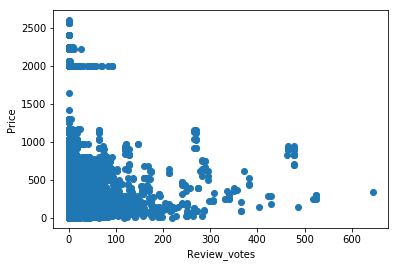

In [40]:
xlabel2 = data_df['Review Votes']
plt.xlabel('Review_votes')
ylabel2 = data_df['Price']
plt.ylabel('Price')
plt.scatter(xlabel2,ylabel2)
plt.show()

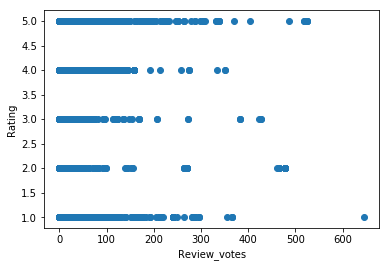

In [41]:
xlabel2 = data_df['Review Votes']
plt.xlabel('Review_votes')
ylabel2 = data_df['Rating']
plt.ylabel('Rating')
plt.scatter(xlabel2,ylabel2)
plt.show()

In [19]:
corr_matrix = data_df.corr()
corr_matrix

,Price,Rating,Review Votes
Price,1.000000,0.073948,0.022164
Rating,0.073948,1.000000,-0.046526
Review Votes,0.022164,-0.046526,1.000000


In [20]:
all_reviews = data_df['Reviews']
all_reviews.head(10)

3322                                The iphone works great!
340538                                            좋군. Good.
205384                           My daughter love the phone
225883                               Is an excelent phone!!
217537                                       very nice fone
108782    Traveled to the Caribbean with this phone it w...
330100    Totally and utterly thrilled with my purchase....
375445                                              Good!~~
128983           Loving it, gets a bit hot with heavy usage
158534    This phone is functional but has few of the fe...
Name: Reviews, dtype: object

In [49]:
data_df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
235893,LG OPTIMUS L7 P705 Factory Unlocked Internatio...,LG,150.00,5,very good,0.0
242671,Moto G Play (4th gen.) - Black - 16 GB - Unloc...,Motorola,149.99,5,Seriously stoked on this phone. It's simple to...,0.0
366569,Samsung Galaxy S6 G920F Unlocked Cell Phone - ...,Samsung,449.00,5,Loved my Galaxy!,0.0
323523,Samsung Galaxy Note 3 (SM-N900V) - 32GB Verizo...,Samsung,219.99,1,I took the phone to Jamaica only to realize th...,5.0
355413,Samsung Galaxy S5 SM-G900A GSM Unlocked Cellph...,Samsung,234.00,1,"I,liked it",1.0


In [21]:
# Reseting index after shuffeling
data_df = data_df.reset_index(drop=True)

In [51]:
data_df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,LG OPTIMUS L7 P705 Factory Unlocked Internatio...,LG,150.00,5,very good,0.0
1,Moto G Play (4th gen.) - Black - 16 GB - Unloc...,Motorola,149.99,5,Seriously stoked on this phone. It's simple to...,0.0
2,Samsung Galaxy S6 G920F Unlocked Cell Phone - ...,Samsung,449.00,5,Loved my Galaxy!,0.0
3,Samsung Galaxy Note 3 (SM-N900V) - 32GB Verizo...,Samsung,219.99,1,I took the phone to Jamaica only to realize th...,5.0
4,Samsung Galaxy S5 SM-G900A GSM Unlocked Cellph...,Samsung,234.00,1,"I,liked it",1.0


In [22]:
all_reviews = data_df['Reviews']
all_sent_values = []
all_sentiments = []

In [57]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...


True

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)

In [30]:
sample = data_df['Reviews'][1231]
print(sample)
print('Sentiment: ')
print(sentiment_value(sample))

Phone was in fair condition. The case had more scratches than originally suggested. For the price, however, a great purchase and delivered very quickly.
Sentiment: 
0.8


In [33]:
sample1 = data_df['Reviews'][99315]
print(sample1)
print('Sentiment: ')
print(sentiment_value(sample1))

i love the look and feel of the phone, as well as the phenominal battery life, and it shipped very fast
Sentiment: 
0.7


In [35]:
sample2 = data_df['Reviews'][9001]
print(sample2)
print('Sentiment: ')
print(sentiment_value(sample2))

Good basic phone
Sentiment: 
0.4


In [36]:
for i in range(0,20000):
    all_sent_values.append(sentiment_value(all_reviews[i]))

In [37]:
len(all_sent_values)

20000

In [38]:
# we are doing sentimental analysis on first 20000 rows as data is too large

In [40]:
temp_data = data_df[:20000]

In [42]:
temp_data.shape

(20000, 6)

In [49]:
# code for sentimental analysis -- assigning sentiment
SENTIMENT=[]
SENTIMENT_VALUE = []
for i in range(0,20000):
    s = all_sent_values[i]
    if (s >= 0.5 and s <= 1):
        SENTIMENT.append('very_positive')
        SENTIMENT_VALUE.append(5)
    elif (s > 0 and s < 0.5):
        SENTIMENT.append('positive')
        SENTIMENT_VALUE.append(4)
    elif (s == 0):
        SENTIMENT.append('nuetral')
        SENTIMENT_VALUE.append(3)
    elif (s < 0 and s > -0.5):
        SENTIMENT.append('negitive')
        SENTIMENT_VALUE.append(2)
    else:
        SENTIMENT.append('very_negitive')
        SENTIMENT_VALUE.append(1)

In [52]:
temp_data['SENTIMENT'] = SENTIMENT
temp_data['SENTIMENT_VALUE'] = SENTIMENT_VALUE

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
temp_data.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,SENTIMENT,SENTIMENT_VALUE
0,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.00,5,The iphone works great!,0.0,very_positive,5
1,"Samsung Galaxy S3 SCH-I535 Verizon Phone, 16GB...",Samsung,92.50,5,좋군. Good.,0.0,positive,4
2,Indigi® Unlocked Android 4.4 KK 3G SmartPhone ...,Indigi,109.92,5,My daughter love the phone,0.0,very_positive,5
3,LG Google Nexus 5 D821 16GB Factory Unlocked (...,LG,385.00,5,Is an excelent phone!!,0.0,nuetral,3
4,LG G3 Beat D722J 8GB Unlocked GSM Quad-Core An...,LG,69.99,4,very nice fone,0.0,very_positive,5
5,BLU Dash C Music-US GSM - Unlocked Cell Phone ...,BLU,54.99,4,Traveled to the Caribbean with this phone it w...,0.0,positive,4
6,Samsung Galaxy Note GT-N7000 Unlocked Cellphon...,Samsung,274.44,5,Totally and utterly thrilled with my purchase....,1.0,very_positive,5
7,Samsung Galaxy S7 Unlocked PhoneDual Sim Facto...,Samsung,679.99,5,Good!~~,0.0,nuetral,3
8,"BLU Life Pure XL Full HD, 16MP, 2.2GHz Quad Co...",BLU,307.00,5,"Loving it, gets a bit hot with heavy usage",0.0,very_positive,5
9,BLU Tank II T193 Unlocked GSM Dual-SIM Cell Ph...,BLU,17.94,3,This phone is functional but has few of the fe...,0.0,very_negitive,1


In [54]:
# finding accuracy
diff = 0
for i in range(0,20000):
    if (abs(temp_data['SENTIMENT_VALUE'][i] - temp_data['Rating'][i]) > 1):
        diff += 1

In [55]:
diff

4752

In [56]:
temp_data.shape

(20000, 8)

In [57]:
accuracy = ((temp_data.shape[0] - diff) / temp_data.shape[0]) * 100

In [58]:
accuracy

76.24